# Tatanic passengers data analysis

### This project is part of Udacity Data Analysis Nanodegree, in specific, is final project of P2 module.

In this analysis we can try to determine who passengers have more chance to survive in Tatanic crash,
we have the data about 891 passengers, a simple of more than 1500 passengers.

We try to response same questions, like to:
- If you were a woman, would have a better chance of surviving ?
- If you were kid, teenager, adult, or elderly, how is your chance have been saved ?
- If you were in first class, you would save ?

### Make your bets and try to save this!

In [59]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pprint as pp
import scipy.stats as st

In [60]:
# Load data set
data = pd.read_csv('titanic_data.csv')

In [61]:
%%javascript
// Disable auto-scroll cell
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Same part of data sample

In [62]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check lost/null data

In [63]:
search_lost_field = lambda x:set(x.isnull())

fields_with_lost_data = []
for i in data:
    if True in search_lost_field(data[i]):
        fields_with_lost_data.append(i)

print('Fields with lost data' )
fields_with_lost_data

Fields with lost data


['Age', 'Cabin', 'Embarked']

In [64]:
# Show percent of data loss
data_length = len(data)
aux_series = pd.Series(100*(1-(data[fields_with_lost_data].count()/data_length).round(3)),index=fields_with_lost_data)

for i in fields_with_lost_data:
    print('Registers with NaN for {} is: {}% data is lost.'.format(i,aux_series[i]))

#Sempre deleto as variáveis que só tem função na célula
%reset_selective -f age,cabin,embarked,total,aux_series

Registers with NaN for Age is: 19.899999999999995% data is lost.
Registers with NaN for Cabin is: 77.10000000000001% data is lost.
Registers with NaN for Embarked is: 0.20000000000000018% data is lost.


# Conclusion about data loss
- Field `Cabin` have a lot of miss data and will not be used in data analysis.
- Field `Age` is very important for analysis and will be normalized in next step.

# Normalize step
In this step `Age`, `Sex` and `PClass` will be normalized.

- For `Age` field, all row with NaN value will be droped.
- For `Sex` filed, `male` will be assigned number 0 and for `female` number 1.
- Fro `PClass` data will be make a reverse values for correlation data in future step. 

In [65]:
# Drop all row with Age is loss
data = data.dropna(axis=0,subset=['Age'],how='any')
data.drop('Age',axis=1)

#Sex male is change to number 0 and female to number 1
def sex_normalize(x):
    if x == "male": return 0
    else: return 1

#Pclass, has changed the order to try to find some correlation, being Pclass 1 = 3, 2 = 2 and 3 = 1.
def pclass_normalize(x):
    if x == 3: return 1
    elif x == 1: return 3
    else: return x

# Apply normalized functions in the data
data['Sex_normalized'] = data['Sex'].apply(sex_normalize)
data['Pclass_normalized'] = data['Pclass'].apply(pclass_normalize)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_normalized,Pclass_normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


# Data analysis Survived vs Dead

0    424
1    290
Name: Survived, dtype: int64


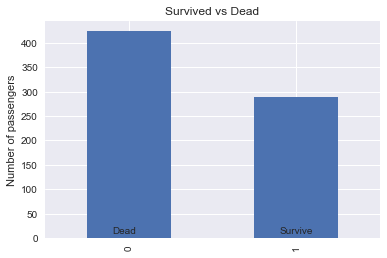

In [66]:
# Survived vs Dead, all data have survived information
plt.title('Survived vs Dead')
plt.ylabel('Number of passengers')
plt.text(-0.1, 10,'Dead')
plt.text(0.9, 10,'Survive')

data.Survived.value_counts().plot.bar()
print(data.Survived.value_counts())

plt.show()

## Conclusion about data analysis Survived vs Dead

It`s obvious what have more dead, because in Tatanic didn't have enough lifeboats for all passengers, and in this sample data reveals this information.

# Correlation variables
Correlating the data to know which variables will be interesting to analyze, but remember, correlation does not mean chance.

In [67]:
data.corr(method='pearson')['Survived'].sort_values(ascending=False)

Survived             1.000000
Sex_normalized       0.538826
Pclass_normalized    0.359653
Fare                 0.268189
Parch                0.093317
PassengerId          0.029340
SibSp               -0.017358
Age                 -0.077221
Pclass              -0.359653
Name: Survived, dtype: float64

## Correlation conclusion
- Fields `Sex` and `PClass` have a nice correlation, is good fields for analysis.
- Field `Age` not correlation because that the emergency landing rule prioritizes children, so let's look at this field as well.

# About passengers Age

In [68]:
# Informations about passengers age`s
print('\n# About passengers age`s')
data['Age'].describe()


# About passengers age`s


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

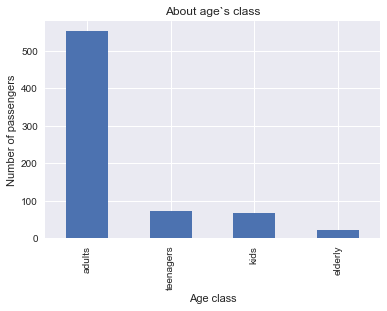

In [69]:
# About age`s class
data["age_groups"] = pd.cut(data.Age.dropna(), [0, 11, 18, 60, 100], labels=["kids", "teenagers", "adults", "elderly"])

plt.title('About age`s class')
plt.xlabel('Age class')
plt.ylabel('Number of passengers')
data['age_groups'].value_counts().plot.bar()

plt.show()

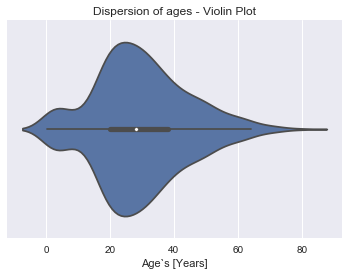

In [70]:
years = data['Age']

gp = sns.violinplot(years)

gp.set_xlabel('Age`s [Years]')
gp.set_title('Dispersion of ages - Violin Plot')

plt.show()

## Conlcusion about passengers Age`s
We see in the analysis of age (1D) that the ages are concentrated around 28 years as shown in the table generated by the function describe ().

# Survived vs Dead by Age
Through the graphical analysis see how the survivors and disappeared are distributed by the age ranges and if there are bands with a greater or lesser survival rate.

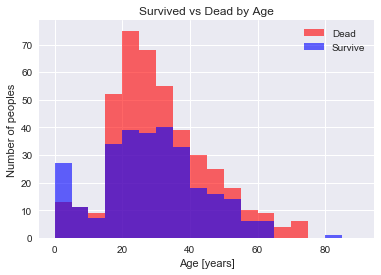

In [71]:
def F_age_filter(cell,criterion):
    return data[cell]==criterion


opacity = 0.6

fig,hist = plt.subplots(sharex=True)

survived_filter = F_age_filter('Survived',1)
not_survived_filter = F_age_filter('Survived',0)

data['Age'].loc[not_survived_filter].hist(bins=range(0,90+1,5),range =(0,90),color='red', alpha=opacity)
data['Age'].loc[survived_filter].hist(bins=range(0,90+1,5),range =(0,90),color='blue', alpha=opacity)

hist.legend(['Dead','Survive'])
plt.title(u'Survived vs Dead by Age')
plt.xlabel(u'Age [years]')
plt.ylabel(u'Number of peoples')

plt.show()

%reset_selective -f not_survived_filter,survived_filter,fig,hist

### Conclusion about Survived vs Dead by Age

- Peoples with range 0-5 have more chance to survive.
- Most passengers between 0-10 survived.
- Elderly people 80 years old survived.
- In others range most people dead.


# Survived vs Dead by gender
Remembering the rule of landing in case of emergency States that women and children (previously proven) are the first to leave the boat and we can see if the graphic evidence that rule.

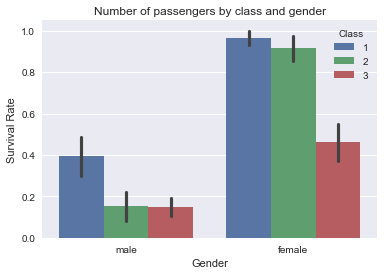

In [72]:
sns.barplot(x='Sex', y='Survived', data=data, hue='Pclass')
plt.xlabel(u'Gender')
plt.ylabel(u'Survival Rate')
plt.title(u'Number of passengers by class and gender')
plt.legend(title='Class')
plt.show()

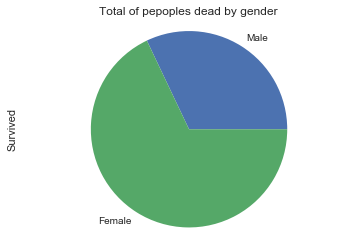

In [73]:
plt.title('Total of pepoples dead by gender')
data.groupby('Sex_normalized')['Survived'].sum().plot.pie(labels=['Male', 'Female'])
plt.axis('equal')
plt.show()

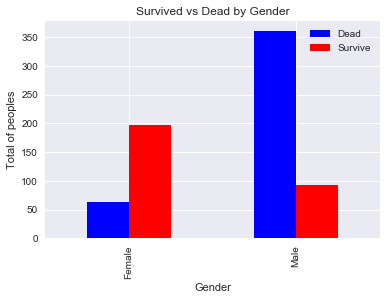

In [74]:
bar = data.groupby(['Sex','Survived']).size().unstack().plot.bar(color=['blue', 'red'])
bar.legend(['Dead','Survive'])
bar.set_xticklabels([u'Female',u'Male'])
bar.set_xlabel(u'Gender')
bar.set_ylabel(u'Total of peoples')
bar.set_title(u'Survived vs Dead by Gender')
plt.show()

## Conclusion Survived vs Dead by Gender
By the chart we have that most of the men died, unlike the women where the majority survived. We can not know if the emergency landing rule was used, but we clearly have that women were the genre with the highest survival rate.

This is an assumption because we should perform some statistical test to understand if within a confidence interval what is being observed in the graphs is associated with the natural variability of the data.

# Survived vs Dead by Class
Understand if you are the passenger class affects the chance of survival.

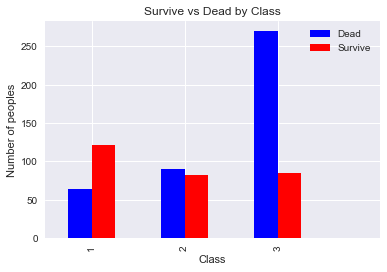

In [75]:
gp =data.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot.bar(color = ['blue','red'])
gp.legend(['Dead','Survive'])
gp.set_xlim((-.5,3.1))
gp.set_title(u'Survive vs Dead by Class')
gp.set_xlabel(u'Class')
gp.set_ylabel(u'Number of peoples')
plt.show()

## Conclusion Survived vs Dead by Class
In the graph we see that the class may be survival factor for class 3. For classes 1 and 2 we can not know if the difference is simply associated with chance.

A statistical test can confirm whether within a confidence interval the survival rate of each class is less, equal or greater than that observed in the population.

# Analysis of survivors by class and gender
From previous analyzes we have that gender and age has an impact on the chance of survival, so we can understand if, for example, the third class has a higher proportion of men this will reflect a lower survival rate.

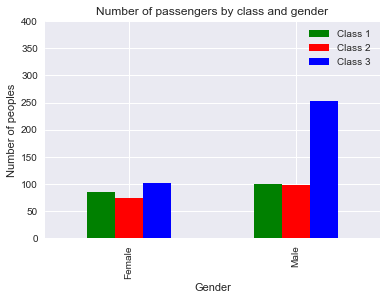

In [76]:
bar = data.groupby(['Sex','Pclass'])['Survived'].count().unstack().plot.bar(color = ['green','red','blue'])
bar.set_ylim([0,400])
bar.legend(['Class 1','Class 2','Class 3'],loc='best')
bar.set_xticklabels(['Female','Male'])
bar.set_xlabel(u'Gender')
bar.set_ylabel(u'Number of peoples')
bar.set_title(u'Number of passengers by class and gender')
plt.show()

Now let's analyze the data through a statistical test

$z_{statistics} = \frac{(mean \ sample) - (mean \ population)}{\frac{\sigma}{\sqrt{(length \ sample)}}}$, 

where $\sigma$ (sigma) is the population deviation (men / women passengers of the Titanic)
Stratifying the data in men and women and applying the Z test on the samples (classes) we determined for a confidence interval of 95% if the average of the samples are part of the population.

In [77]:
%matplotlib inline

def F_ZStatistic(gender):
    '''Function to calcule z-score for each class
        Args:
            gender: 'male' ou 'female'
        Return: z-score gender and class
    '''
    pop_mean = data.groupby(['Sex'])['Survived'].mean()[gender]

    sample_n = data.groupby(['Sex','Pclass'])['Survived'].count()[gender]
    
    pop_std = data.groupby(['Sex'])['Survived'].std(ddof=0)[gender]

    sample_mean = data.groupby(['Sex','Pclass'])['Survived'].mean()[gender]

    standard_error = pop_std/np.sqrt(sample_n)

    return pd.Series(data=np.array((sample_mean - pop_mean)/standard_error),index=['Class 1','Class 2','Class 3'])

In [99]:
def S_visualize_test(gp,z_statistics,CI,direction='right',title=None, xlabel=None,ylabel=None):
    '''Function to create graphics
        Args:
            gp: Graph objective
            z_statistics: Z-Score calculated of sample
            CI: Confidence interval, between 0 and 1
            direction: 'left' or 'right', cirtical zone location
            title: graphic title
            xlabel: title of axis x
            ylabel: title of axis y
        Return: void
    '''
    x = np.arange(-5,5,0.1)
    normal = st.norm.pdf(x)
    z_critical = st.norm.ppf(CI)
    
    if direction == 'right':
        x_critical = np.arange(z_critical,5,0.1)
    elif direction=='left':
        x_critical = np.arange(-5,-z_critical,0.1)
    
    y_critical = st.norm.pdf(x_critical)

    gp.plot(x,normal)
    gp.fill_between(x_critical,y_critical,color='red')

    gp.axvline(z_statistics,ymin=0,ymax=.25,color='green')
    gp.text(x=z_statistics,y=.10,s='Z-Statistics',bbox=dict(facecolor='white', alpha=1))
    gp.legend([u'Default Standard Deviation',u'Z calculated',u'Critical Area'],loc='upper left',fontsize=9)
    gp.set_title(title)
    gp.set_xlabel(xlabel)
    gp.set_ylabel(ylabel)

In [100]:
def S_CreatePlotTest(gender,sex,direction):
    '''Function to call others routines and create 3 graphics with calculated z-statistics 
        Args:
            gender: write if female or male in graphic
            sex: 'male' or 'female' for filter data
            direction: 'right' or 'left' to determine direction of statistics direction test
        Return: not have return
    '''
    
    #Calculando valores para cada classe
    z_statistic = F_ZStatistic(sex)

    fig, gp = plt.subplots(1,3,sharex=True,sharey=True)
    fig.set_figheight(4),fig.set_figwidth(16)
    fig.suptitle(u'Z test applied into samples (classes) for {} - Survive probability'.format(gender),\
                 fontsize=12,color='blue')

    title, xlabel,ylabel=u'{}- Z test for class {}'.format(gender,1),u'Z-Scores',u'Survive probability'
    S_visualize_test(gp[0],z_statistics=z_statistic['Class 1'],CI=.95,direction=direction['Class 1'],title=title, xlabel=xlabel,ylabel=ylabel)
    
    title, xlabel,ylabel=u'{}- Z test for class {}'.format(gender,2),u'Z-Scores',u'Survive probability'
    S_visualize_test(gp[1],z_statistics=z_statistic['Class 2'],CI=.95,direction=direction['Class 2'],title=title, xlabel=xlabel,ylabel=ylabel)

    title, xlabel,ylabel=u'{}- Z test for class {}'.format(gender,3),u'Z-Scores',u'Survive probability'
    S_visualize_test(gp[2],z_statistics=z_statistic['Class 3'],CI=.95,direction=direction['Class 3'],title=title, xlabel=xlabel,ylabel=ylabel)

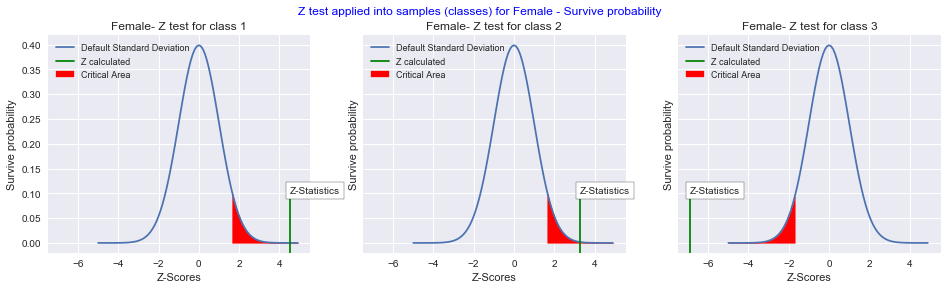

In [101]:
directions = pd.Series({'Class 1':'right','Class 2':'right','Class 3':'left'})
S_CreatePlotTest('Female','female',directions)

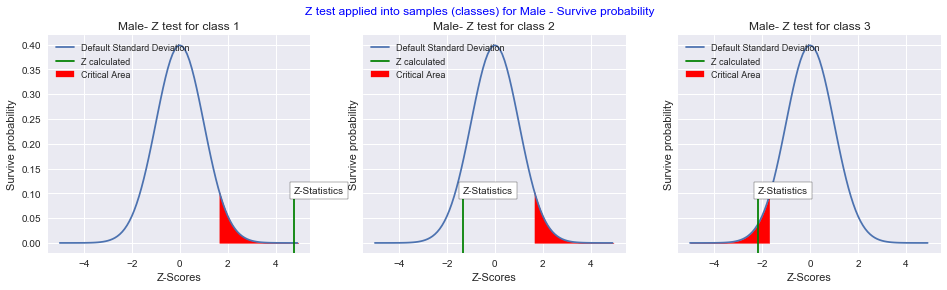

In [102]:
directions = pd.Series({'Class 1':'right','Class 2':'right','Class 3':'left'})
S_CreatePlotTest('Male','male',directions)

# Conclusion

### Women
We have that for the samples (classes) 1 and 2 the graph shows that the Z-Statisics is within the region with 95% confidence interval, that is, if we have as a null hypothesis that women in classes 1 and 2 have the same Probability of survival or even lower than that of the female population, the null hypothesis would be rejected and the same would occur with women in class 3, where the null hypothesis that the average survival of the sample (class) would be higher or equal to that of the population also Would be rejected. This all means that variation is not associated with chance, so women in class 3 are less likely to survive than those in class 1 and 2.

### Men's
For men, we have a similar analysis to what happened with women, except for the sample (class) 2, where the null hypothesis would not be rejected and the sample mean would be equal to or greater than the population mean. And this tells us that for class 1 has a greater chance of survival, class 2 can not affirm anything and class 3 has a lower chance of survival than the other classes.

# Conclusion about this analysis

With this sample of about 891 passengers, we know we have many variables and situations like location of cabines and location of peoples in impact moment, that are impossible to collect and analyze, but, with bases in our analysis, you know that You if a woman or children and the first class would have higher chances of survival